In [10]:
#Random YOLO bboxes + image visualization 

import os
import random
from PIL import Image, ImageDraw

# Path to the directory containing the images
images_directory = 'C:/Users/rowanconverse/Desktop/eBee/labels/4_tiles/img'

# Path to the directory containing the labels
labels_directory = 'c:/Users/rowanconverse/Desktop/eBee/labels/4_tiles/test'

# Choose a random image
image_files = os.listdir(images_directory)
random_image_file = random.choice(image_files)
image_path = os.path.join(images_directory, random_image_file)

# Corresponding label file
label_file = os.path.splitext(random_image_file)[0] + '.txt'
label_path = os.path.join(labels_directory, label_file)

# Load the image
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Read the label file
with open(label_path, 'r') as f:
    lines = f.readlines()

# Draw bounding boxes on the image
for line in lines:
    class_id, x, y, width, height = map(float, line.strip().split(' '))
    left = (x - width / 2) * image.width
    top = (y - height / 2) * image.height
    right = (x + width / 2) * image.width
    bottom = (y + height / 2) * image.height
    draw.rectangle([(left, top), (right, bottom)], outline='red')

# Show the image with labels
image.show()

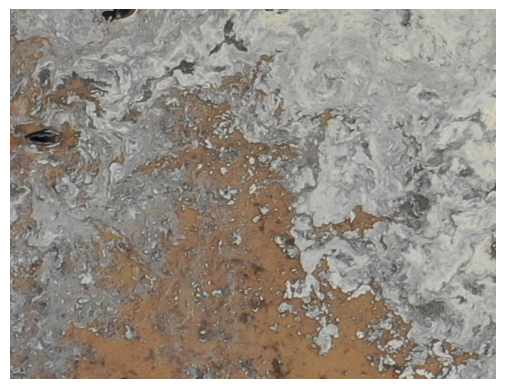

In [9]:
#COCO bboxes + random image visualization 
import os
import cv2
import random
import json
from matplotlib import pyplot as plt

def visualize_random_tile(tile_directory, json_file):
    # Select a random tiled image
    tiled_images = [file for file in os.listdir(tile_directory) if file.endswith('.png')]
    random_tile = random.choice(tiled_images)
    tile_path = os.path.join(tile_directory, random_tile)
    
    # Find corresponding labels from JSON data
    with open(json_file, 'r') as f:
        json_data = json.load(f)
    
    tile_labels = [label for label in json_data if label['filename'] == os.path.splitext(random_tile)[0]]
    
    # Load and visualize the tile image with bounding boxes
    visualize_bboxes_on_tile(tile_path, tile_labels)

def visualize_bboxes_on_tile(tile_path, tile_labels):
    image = cv2.imread(tile_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image)
    plt.axis('off')
    
    for label in tile_labels:
        bbox = label['bbox']
        x, y, width, height = bbox
        class_id = label['class_id']
        
        # Draw bounding box
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor='red', linewidth=2))
        
        # Add label text
        plt.text(x, y - 10, class_id, fontsize=10, color='red', weight='bold')
    
    plt.show()

# Example usage
tile_directory = 'C:/Users/rowanconverse/Desktop/data/tiles/'
json_file = 'C:/Users/rowanconverse/OneDrive - University of New Mexico/CV4Ecology/Prototyping/Data/Labels/coco/20220227_dgc.json'
#json_file = 'C:/Users/rowanconverse/OneDrive - University of New Mexico/CV4Ecology/Prototyping/Data/Labels/coco/PUBLICRELEASE/refined/20230331_dronesforducks.json'

visualize_random_tile(tile_directory, json_file)

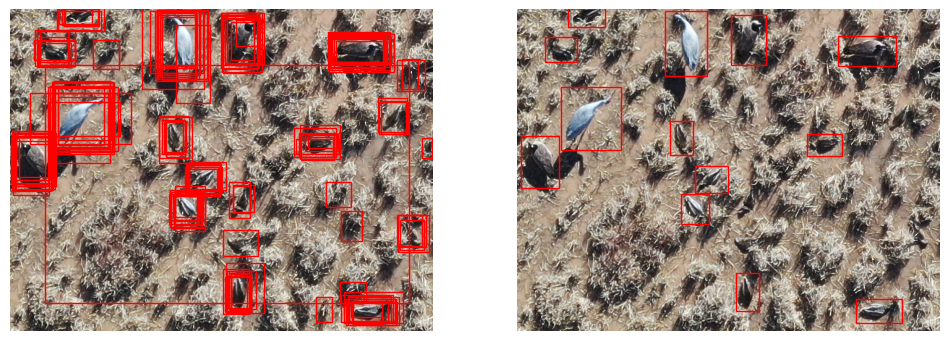

In [2]:
import os
import json
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import ast

def visualize_bounding_boxes(image_path, json_file, csv_file):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Read the JSON file
    with open(json_file, 'r') as f:
        json_data = json.load(f)
    
    # Read the CSV file
    csv_data = pd.read_csv(csv_file)
    
    # Find the corresponding image ID in the JSON file
    image_filename = os.path.splitext(os.path.basename(image_path))[0]  # Get filename without extension
    image_id = None
    for img in json_data:
        if os.path.splitext(img['filename'])[0] == image_filename:
            image_id = img['filename']
            break
    if image_id is None:
        print(f"Image '{image_filename}' not found in {json_file}")
        return
    
    # Find the corresponding annotations in the JSON file
    annotations1 = [ann for ann in json_data if ann['filename'] == image_id]
    
    # Find the corresponding annotations in the CSV file
    annotations2 = csv_data[csv_data['filename'].apply(lambda x: os.path.splitext(x)[0] == image_filename)]
    
    # Plot the image with bounding boxes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the bounding boxes from the JSON file
    ax = axes[0]
    ax.imshow(image)
    #ax.set_title('Raw Bounding Boxes')
    ax.axis('off')
    for ann in annotations1:
        bbox = ann['bbox']
        rectangle = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    
    # Plot the bounding boxes from the CSV file
    ax = axes[1]
    ax.imshow(image)
    #ax.set_title('Consensus Bounding Boxes')
    ax.axis('off')
    for _, row in annotations2.iterrows():
        bbox = ast.literal_eval(row['bbox'])  # Parse bbox values from string to list
        rectangle = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    
    # Show the plot
    plt.show()

# Example usage
image_path = 'C:/Users/rowanconverse/Desktop/data/tiles/BDA_12C_20181127_2_04_04.png'
json_file = 'C:/Users/rowanconverse/OneDrive - University of New Mexico/CV4Ecology/Prototyping/Data/Labels/coco/outdated/20221212_zooniverse_coco.json'
csv_file = 'C:/Users/rowanconverse/Desktop/data/crowd_tiles.csv'

visualize_bounding_boxes(image_path, json_file, csv_file)